# Movie Recommendation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_ratings = pd.read_csv('C:\\Users\\Namu\\Desktop\\Projects\\Movie Recommandation\\ratings\\ratings.csv')
data_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
data_movies = pd.read_csv('C:\\Users\\Namu\\Desktop\\Projects\\Movie Recommandation\\movies.csv')
data_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data_ratings.shape

(100836, 4)

In [5]:
data_movies.shape

(9742, 3)

In [6]:
data_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [7]:
data_movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [8]:
merge_data = pd.merge(data_ratings,data_movies, on = 'movieId' )
merge_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [9]:
merge_data['Date&time'] = pd.to_datetime(merge_data['timestamp'])
merge_data.head()

,userId,movieId,rating,timestamp,title,genres,Date&time
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:00.964982703
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:00.847434962
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:01.106635946
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:01.510577970
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:01.305696483


In [10]:
merge_data.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
title         9719
genres         951
Date&time    85043
dtype: int64

In [11]:
#making groups by ratings
x = merge_data
x = x.groupby('title')['rating'].mean()
x

title
'71 (2014)                                   4.000000
'Hellboy': The Seeds of Creation (2004)      4.000000
'Round Midnight (1986)                       3.500000
'Salem's Lot (2004)                          5.000000
'Til There Was You (1997)                    4.000000
                                               ...   
eXistenZ (1999)                              3.863636
xXx (2002)                                   2.770833
xXx: State of the Union (2005)               2.000000
¡Three Amigos! (1986)                        3.134615
À nous la liberté (Freedom for Us) (1931)    1.000000
Name: rating, Length: 9719, dtype: float64

In [12]:
sorted_data = x.sort_values(ascending=False)
sorted_data

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
                                                ... 
The Beast of Hollow Mountain (1956)              0.5
Follow Me, Boys! (1966)                          0.5
The Butterfly Effect 3: Revelations (2009)       0.5
The Emoji Movie (2017)                           0.5
Rust and Bone (De rouille et d'os) (2012)        0.5
Name: rating, Length: 9719, dtype: float64

In [13]:
y = merge_data.groupby('title')['rating'].count()
y.tail()

title
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, dtype: int64

In [14]:
#making new dataframe
new_data = pd.DataFrame()
new_data['Average ratings'] = x

In [15]:
new_data['Count of total ratings'] = y
new_data.head()

,Average ratings,Count of total ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [16]:
new_data.columns

Index(['Average ratings', 'Count of total ratings'], dtype='object')

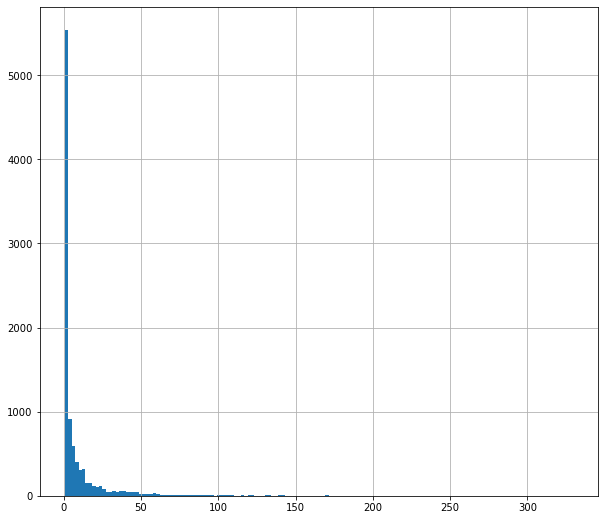

In [17]:
#plot graph of number of ratings
plt.figure(figsize= (10,9))
new_data['Count of total ratings'].hist(bins=150)


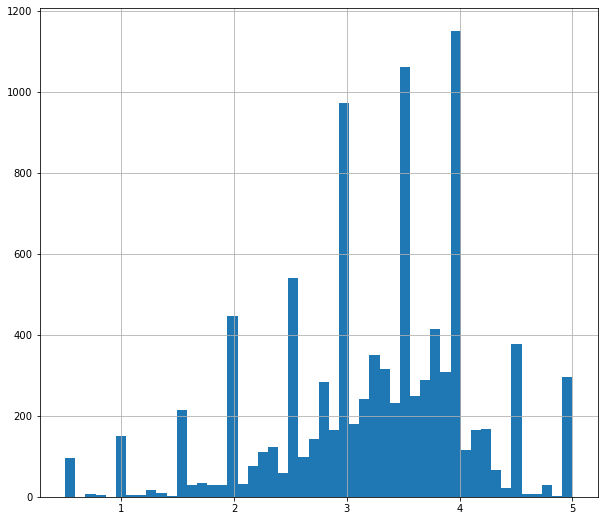

In [18]:
#plot graph of ratings
plt.figure(figsize= (10,9))
new_data['Average ratings'].hist(bins=50)


<Figure size 1440x1296 with 0 Axes>

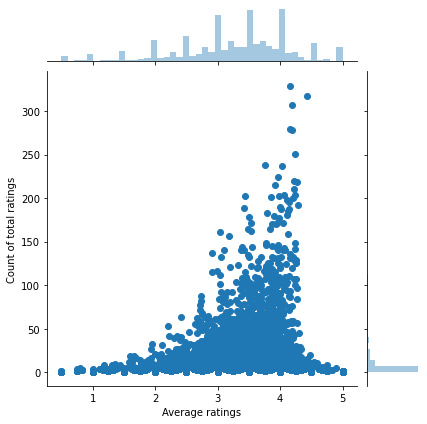

In [19]:
#joint plot of Average ratings & Count of total ratings
plt.figure(figsize= (20,18))
sns.jointplot(x = 'Average ratings' , y = 'Count of total ratings', data= new_data)

In [49]:
#Sorting values according to the 'num of rating columns'
matrix_movie = merge_data.pivot_table(index= 'userId', columns='title', values = 'rating')
matrix_movie.head()
matrix_movie.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [62]:
a = matrix_movie['eXistenZ (1999)']
a

userId
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    NaN
607    NaN
608    4.5
609    NaN
610    NaN
Name: eXistenZ (1999), Length: 610, dtype: float64

In [63]:
a_ratings = a

In [64]:
a.tail()


userId
606    NaN
607    NaN
608    4.5
609    NaN
610    NaN
Name: eXistenZ (1999), dtype: float64

In [65]:
movies_similar_a = matrix_movie.corrwith(a_ratings) 
movies_similar_a

c:\users\namu\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\namu\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              1.000000
xXx (2002)                                   0.762493
xXx: State of the Union (2005)                    NaN
¡Three Amigos! (1986)                       -0.337963
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

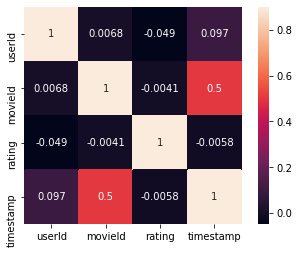

In [66]:
correlation = merge_data.corr()
figure = plt.figure()
sns.heatmap(correlation, annot=True, vmax=0.9, square=True)
plt.show()

In [67]:
a_corr = pd.DataFrame(movies_similar_a, columns=['Correlation'])
a_corr.dropna(inplace= True)
a_corr

,Correlation
title,
"'burbs, The (1989)",-0.067522
(500) Days of Summer (2009),-0.388883
*batteries not included (1987),1.000000
10 Things I Hate About You (1999),-0.396883
"10,000 BC (2008)",0.500000
...,...
Zombieland (2009),0.996116
Zoolander (2001),0.000000
eXistenZ (1999),1.000000
